In [19]:
#import numpy as np
import pickle
import pandas as pd
from training_accessories_march_23 import *
sys.path.insert(0, './functions')
from plotting import *

nevents=all
if nevents==600:
    path_to_result='/home/bishnu/EIC/regressiononly/results_deepsets_600k/Block_20230330_1217_concatTrue'
    path_for_mean='/home/bishnu/EIC/regressiononly/preprocessed_data_deepsets_600k'
else:    
    
    path_to_result='/home/bishnu/EIC/regressiononly/results_all/Block_20230331_1758_concatTrue'
    path_for_mean='/home/bishnu/EIC/regressiononly/preprocessed_data_all'
    print("This is all events")

os.environ["CUDA_VISIBLE_DEVICES"] = ""
import compress_pickle as pickle

'''
data_dir1: /media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_discrete_17deg_100_6k_1/
  data_dir2: /media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_discrete_17deg_100_6k_2/
  data_dir3: /media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_discrete_17deg_100_6k_3/
'''

This is all events


'\ndata_dir1: /media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_discrete_17deg_100_6k_1/\n  data_dir2: /media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_discrete_17deg_100_6k_2/\n  data_dir3: /media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_discrete_17deg_100_6k_3/\n'

## Choose path to the model and draw loss curves

['training', 'validation']
(100, 704)


Text(0, 0.5, 'Loss (MAE)')

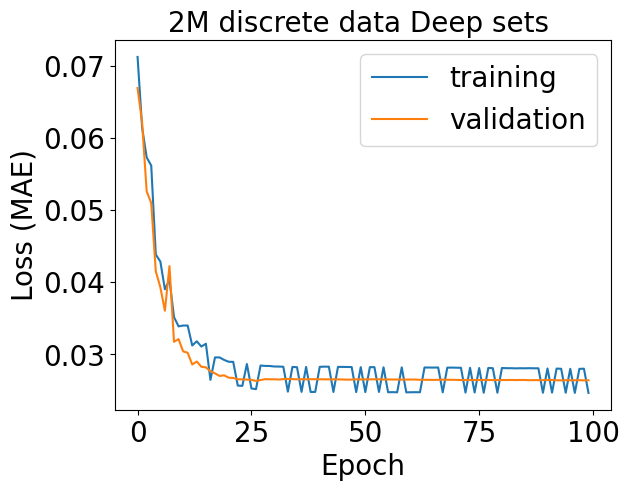

In [26]:
#path_to_pred = '/home/bishnu/EIC/deepsets_output/'
path_to_pred='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/DeepSets_output/\
results_discrete_pi+_17deg_all/Block_20230331_1758_concatTrue'

#loss=np.load(f'{path_to_result}/losses.npz')
data = np.load(f'{path_to_pred}/losses.npz')

print(data.files)
training = data['training']
validation=data['validation']

print(training.shape)
#plt.plot(range(len(arr)), arr)
#plt.plot(range(len(data)), data[0])
#arr.shape
plt.plot(range(len(training)),training[:,-1], label='training')
plt.plot(range(len(validation)),validation[:,-1], label='validation')
plt.legend(fontsize=20)
plt.title("2M discrete data Deep sets ")
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss (MAE)',fontsize=20)
#plt.hist(data[0])


In [29]:

data_type='discrete'
# Load the .p file
general_path="/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/DeepSets_output/"
if data_type=='discrete':
    mean_dir="preprocessed_data_discrete_pi+_17deg_all"
    
elif data_type=='continuous':
    mean_dir="preprocessed_data_continuous_pi+_17deg_all"
    
path_for_mean=f"{general_path}{mean_dir}"
mean = pickle.load(open(f'{path_for_mean}/means.p','rb'), compression='gzip')

std = pickle.load(open(f'{path_for_mean}/stdvs.p','rb'), compression='gzip')


print(mean)
mean_target=mean['genP']
std_target=std['genP']

{'.energy': -3.926840696010144, '.position.x': -113.07294951960586, '.position.y': 0.6651624745177469, '.position.z': 4387.065681814708, 'clusterE': 1.1782916717479885, 'genP': 1.1563398547380421}


In [ ]:
{'.energy': -3.926840696010144, '.position.x': -113.07294951960586, '.position.y': 0.6651624745177469, '.position.z': 4387.065681814708,
 'clusterE': 1.1782916717479885, 'genP': 1.1563398547380421}

In [30]:
pred=np.load(f'{path_to_pred}/predictions_appended.npz')
print(pred.files)
true_raw=pred['targets']
true=(true_raw*std_target) + mean_target

prediction=(pred['outputs']*std_target) + mean_target
true_actual=10**true
prediction_actual=10**prediction

plt.hist(prediction_actual, bins=100, label='prediction')
plt.hist(true_actual, bins=100, label='true')
plt.legend(fontsize=20)

print('shape of true ',true.shape, 'shape of prediction ', prediction.shape)
#pred_act=
#plt.hist(pred['targets'])

FileNotFoundError: [Errno 2] No such file or directory: '/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/DeepSets_output/results_discrete_pi+_17deg_all/Block_20230331_1758_concatTrue/predictions_appended.npz'

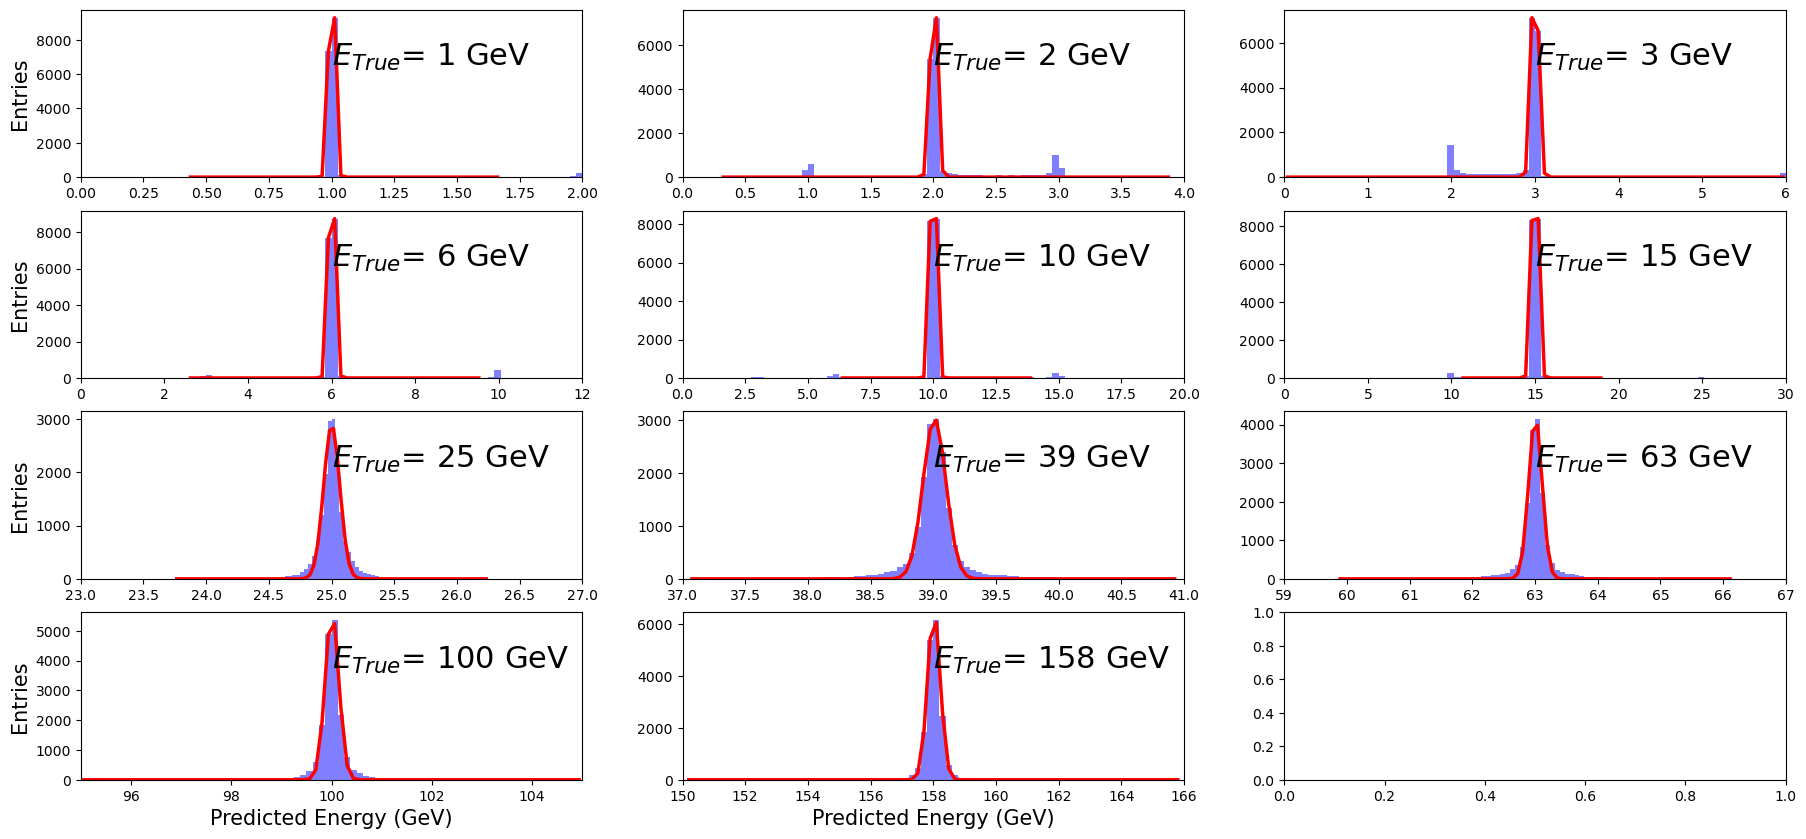

In [5]:
log_base=10
particle='pi+'
nbins=80
input_dim=4
approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"
detector='hcal'
resolution_fit, pred_over_truth_fit, true_fit,slices_fit,resolution_scale_corr_fit, median_scale_fit,slices_truth,\
    res_std_median, res_sigma_median =get_res_scale_fit_log10_log2(true_actual,prediction_actual, nbins, 
                                                                   log_base, particle)


df = pd.DataFrame(slices_fit)
df.to_csv(f'{output_path}/{approach}_fit_{detector}_{particle}_{log_base}.csv', index=False)  
df_straw_truth = pd.DataFrame(slices_truth)
df.to_csv(f'{output_path}/{approach}_truth_{detector}_{particle}_{log_base}.csv', index=False) 

In [6]:
particle='pi+'
detector='hcal'
name_tag='ds_'
if (particle=='pi+') & (detector=='hcal'):
    particle_detector='pp_hcal_2M'
elif (particle=='pi+') & (detector=='hcal_insert'):
    particle_detector='pp_hcali_2M'
elif (particle=='e-') & (detector=='hcal_insert'):
    particle_detector='e_hcali_2M'    
elif (particle=='e-') & (detector=='hcal'):
    particle_detector='e_hcal_2M'


print_parameter(true_fit, name_tag +'energy',particle_detector ) 
print_parameter(resolution_scale_corr_fit, name_tag+'res_cor',particle_detector  )
print_parameter(pred_over_truth_fit, name_tag +'scale_fit', particle_detector ) 
print_parameter(resolution_fit, name_tag +'res_sigma', particle_detector ) 
print_parameter(res_std_median, name_tag +'res_std_median', particle_detector ) 
print_parameter(res_sigma_median, name_tag +'res_sigma_median', particle_detector )
print_parameter(median_scale_fit, name_tag +'scale_median', particle_detector )


ds_energy_pp_hcal_2M=np. array([  1.,   2.,   3.,   6.,  10.,  15.,  25.,  39.,  63., 100., 158.])
ds_res_cor_pp_hcal_2M=np. array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01, -0.  ,  0.  ,  0.  ,
        0.  ,  0.  ])
ds_scale_fit_pp_hcal_2M=np. array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
ds_res_sigma_pp_hcal_2M=np. array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01, -0.  ,  0.  ,  0.  ,
        0.  ,  0.  ])
ds_res_std_median_pp_hcal_2M=np. array([0.21, 0.3 , 0.35, 0.2 , 0.13, 0.09, 0.09, 0.09, 0.09, 0.1 , 0.09])
ds_res_sigma_median_pp_hcal_2M=np. array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01, -0.  ,  0.  ,  0.  ,
        0.  ,  0.  ])
ds_scale_median_pp_hcal_2M=np. array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


In [13]:
straw_energy_pp_hcal_2M=np. array([  1.,   2.,   3.,   6.,  10.,  15.,  25.,  39.,  63., 100., 158.])
straw_res_cor_pp_hcal_2M=np. array([0.32, 0.25, 0.22, 0.14, 0.1 , 0.09, 0.07, 0.06, 0.05, 0.04, 0.05])
straw_scale_fit_pp_hcal_2M=np. array([0.88, 0.93, 0.96, 0.99, 1.01, 1.02, 1.02, 1.02, 1.02, 1.01, 0.99])
straw_res_sigma_pp_hcal_2M=np. array([0.28, 0.23, 0.21, 0.14, 0.11, 0.09, 0.07, 0.06, 0.05, 0.04, 0.05])
straw_res_std_median_pp_hcal_2M=np. array([0.45, 0.33, 0.27, 0.19, 0.15, 0.14, 0.13, 0.12, 0.13, 0.12, 0.13])
straw_res_sigma_median_pp_hcal_2M=np. array([0.31, 0.25, 0.22, 0.14, 0.1 , 0.09, 0.07, 0.06, 0.05, 0.04, 0.05])
straw_scale_median_pp_hcal_2M=np. array([0.9 , 0.94, 0.97, 1.  , 1.01, 1.02, 1.02, 1.01, 1.01, 1.  , 0.98])

ds_energy_pp_hcal_2M=np. array([  1.,   2.,   3.,   6.,  10.,  15.,  25.,  39.,  63., 100., 158.])
ds_res_cor_pp_hcal_2M=np. array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01, -0.  ,  0.  ,  0.,0.  ,  0.  ])
ds_scale_fit_pp_hcal_2M=np. array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
ds_res_sigma_pp_hcal_2M=np. array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01, -0.,0.  ,  0.  ,0.  ,  0.  ])
ds_res_std_median_pp_hcal_2M=np. array([0.21, 0.3 , 0.35, 0.2 , 0.13, 0.09, 0.09, 0.09, 0.09, 0.1 , 0.09])
ds_res_sigma_median_pp_hcal_2M=np. array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01, -0.  ,0. , 0.  ,0.  ,  0.  ])
ds_scale_median_pp_hcal_2M=np. array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
'''
ds_energy_pp_hcal_2M=np. array([  1.,   2.,   3.,   6.,  10.,  15.,  25.,  39.,  63., 100., 158.])
ds_res_cor_pp_hcal_2M=np. array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ])
ds_scale_fit_pp_hcal_2M=np. array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
ds_res_sigma_pp_hcal_2M=np. array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ])
ds_res_std_median_pp_hcal_2M=np. array([0.35, 0.38, 0.36, 0.17, 0.13, 0.09, 0.1 , 0.09, 0.09, 0.1 , 0.09])
ds_res_sigma_median_pp_hcal_2M=np. array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ])
ds_scale_median_pp_hcal_2M=np. array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
'''


'\nds_energy_pp_hcal_2M=np. array([  1.,   2.,   3.,   6.,  10.,  15.,  25.,  39.,  63., 100., 158.])\nds_res_cor_pp_hcal_2M=np. array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ])\nds_scale_fit_pp_hcal_2M=np. array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])\nds_res_sigma_pp_hcal_2M=np. array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ])\nds_res_std_median_pp_hcal_2M=np. array([0.35, 0.38, 0.36, 0.17, 0.13, 0.09, 0.1 , 0.09, 0.09, 0.1 , 0.09])\nds_res_sigma_median_pp_hcal_2M=np. array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ])\nds_scale_median_pp_hcal_2M=np. array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])\n'

Strawman
Deep Sets


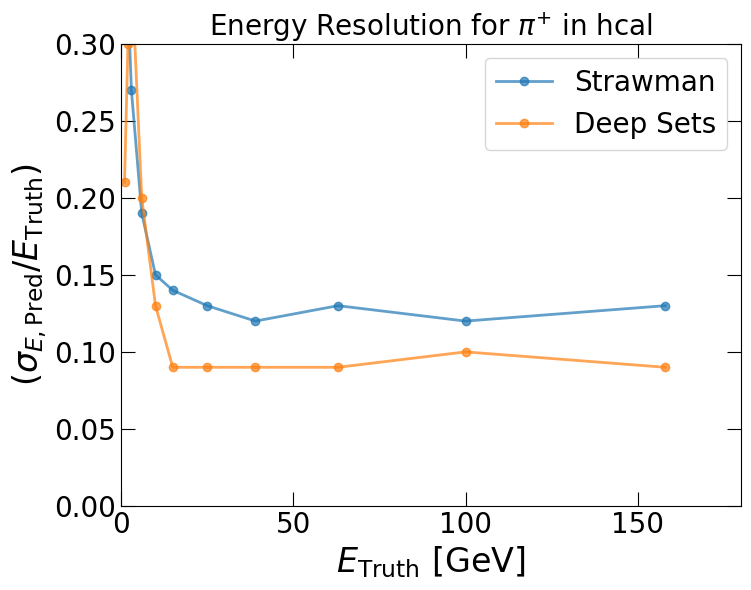

In [14]:
title='resolution'
xlim_max=180
ylim_max=0.3
var_X=[straw_energy_pp_hcal_2M, ds_energy_pp_hcal_2M]
labels=["Strawman","Deep Sets"]
var_Y_res=[straw_res_std_median_pp_hcal_2M, ds_res_std_median_pp_hcal_2M]



var_Y_scale=[straw_scale_median_pp_hcal_2M , ds_scale_median_pp_hcal_2M]


draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector)



Strawman
Deep Sets


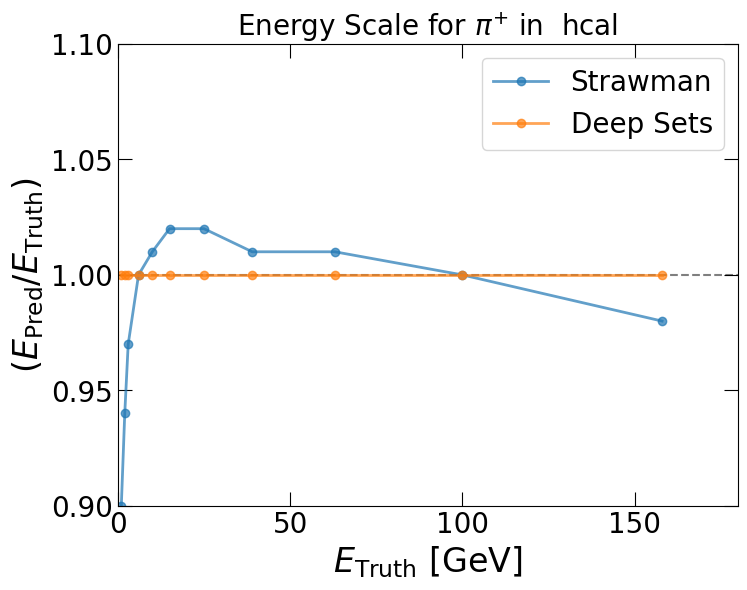

In [15]:
title='scale'
xlim_max=180
ylim_max=1.1
draw_plot_res_scale(var_X, var_Y_scale, labels, title,  xlim_max, ylim_max, particle, detector)

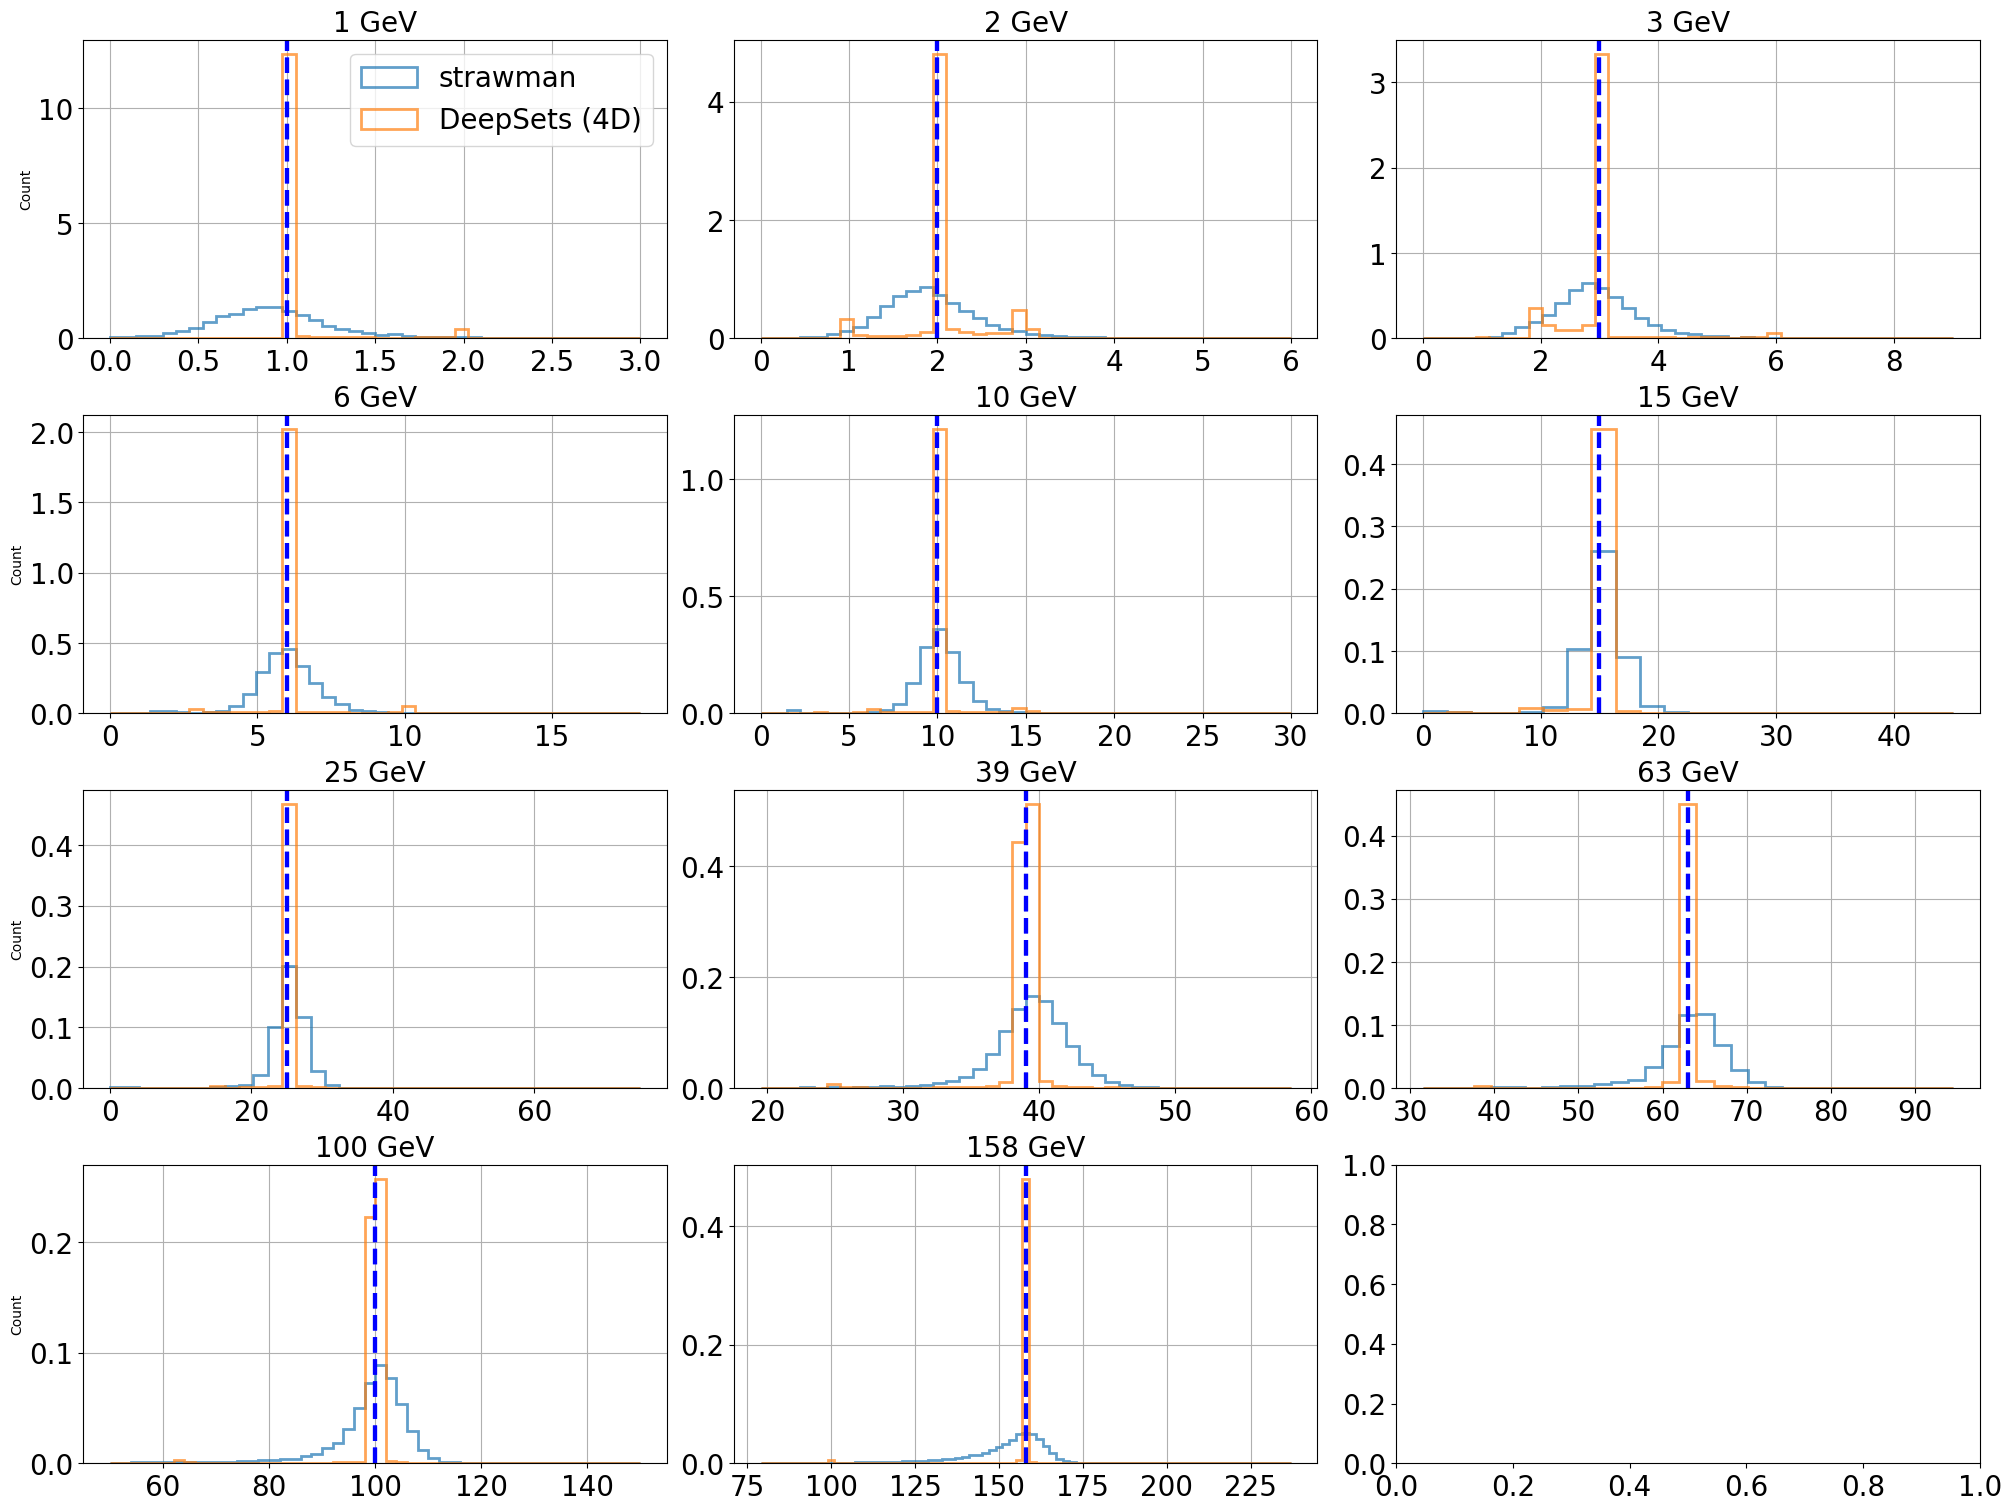

In [17]:
particle='pi+'
detector='hcal'
log_base=10
nbins=40
dir_list=["strawman_fit_slices_Final","DeepSets"]
labels=["strawman","DeepSets (4D)"]
approach=["strawman", "DeepSets_4D"]
#list_of_dir, labels,log_base, detector, particle,slices_individual=True, ylogscale=True):
compare_energy_response(dir_list,labels, log_base, detector, particle, approach, slices_individual=True, ylogscale=False)

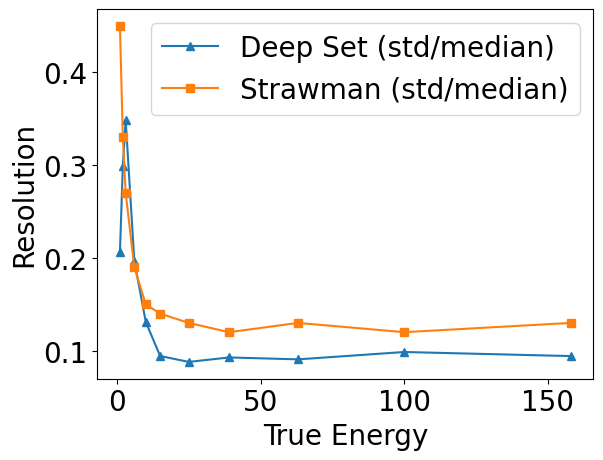

In [11]:
#plt.plot(true_fit, res_sigma_median, marker='*',label='Fit sigma/median')
plt.plot(true_fit,  res_std_median, marker='^',label="Deep Set (std/median)")
plt.plot(straw_energy_pp_hcal_2M, straw_res_std_median_pp_hcal_2M , marker='s', label="Strawman (std/median)")
plt.ylabel('Resolution', fontsize=20)
plt.xlabel('True Energy',fontsize=20)
plt.legend(fontsize=20)

In [12]:
title='resolution'
xlim_max=180
ylim_max=0.3
var_X=[straw_energy_pp_hcal_2M, DNN_2D_energy_pp_hcal_2M, DNN_3D_energy_pp_hcal_2M, DNN_4D_energy_pp_hcal_2M,
       DNN_5D_energy_pp_hcal_2M]
labels=["Strawman","2D hit (EZ)", "3D hit (EXZ)","4D hit (EXYZ)","5D hit (EXYZT)"]
var_Y_res=[straw_res_cor_pp_hcal_2M, DNN_2D_res_cor_pp_hcal_2M, DNN_3D_res_cor_pp_hcal_2M, DNN_4D_res_cor_pp_hcal_2M, 
               DNN_5D_res_cor_pp_hcal_2M]



var_Y_scale=[straw_scale_fit_pp_hcal_2M, DNN_2D_scale_fit_pp_hcal_2M, DNN_3D_scale_fit_pp_hcal_2M, DNN_4D_scale_fit_pp_hcal_2M, 
               DNN_5D_scale_fit_pp_hcal_2M]


draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector)




straw_scale_median_pp_hcal_2M=np. array([0.9 , 0.94, 0.97, 1.  , 1.01, 1.02, 1.02, 1.01, 1.01, 1.  , 0.98])
pred_over_truth_fit=[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

plt.plot(true_fit,pred_over_truth_fit)
plt.ylabel('Pred/truth', fontsize=20)
plt.xlabel('True Energy',fontsize=20)
plt.ylim(0.99,1.01)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (391679404.py, line 22)

In [ ]:
import os
import sys
import glob
#import uproot as ur
data_dir1="/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_discrete_17deg_100_6k_1/"

data_dir2="/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_discrete_17deg_100_6k_2/"

data_dir3="/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_discrete_17deg_100_6k_3/"


import glob
import numpy as np

# specify the data directories
data_dirs = [data_dir1, data_dir2, data_dir3]

# create a list to store the file paths
root_files = []

# loop through the data directories
for dir_path in data_dirs:
    # find all *.root files in the current directory
    file_paths = glob.glob(dir_path + '*.root')
    # add the file paths to the list
    root_files += file_paths

# sort the file paths
root_files = np.sort(root_files)

# do something with the file list
print(len(root_files))


'''
root_files = np.sort(glob.glob(data_dir+'*root'))
use_file=root_files[0:4]
print(use_file)
#ur_file = ur.open(use_file)
#ur_tree = ur_file['events']
#num_entries = ur_tree.numentries
'''